# Gaussian Processes Tutorial-ish with  badly written Python Code

This should be a way to give you an intuition of what Gaussian Processes
do and a little bit how they do this

First lets assume we want to predict some values given some observed values.
For example we have some measured points y at given time x

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1,2,3,4.6,6,7,9,10]).reshape(-1,1)
y_train = np.array([3,1.8,1,2,3,4,3,5]).reshape(-1,1)

**x** <- Is an array at some specific given times.
They don't have to be equaly distributed, since they are just the times
when we were able to take measurement

**y** <- Is the array we get from measuring at the specific
time x and get results at this specific time

These are all our points and the information we have given.
From this our goal is to find the values at a different time
stamp, or what else is represented by x.

For example: We have derived at time x our measurements y. But now
we realize that we had forgotten some measurements and try to fake it
the best we can. So we decide to approximate the values at those given
times.

All times we had to capture are in x_task, so some points we measured
but some points were forgotten and we have to approximate them


In [2]:
x_task = np.arange(0,11,0.2).reshape(-1,1)
print("Shape of x_task: ",x_task.shape)

Shape of x_task:  (55, 1)


So we know that we have to predict those 55 values.
For some we already know the value but for some we don't know.
And for this we use a kernel:

In [3]:
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

In [16]:
print(np.sum(x_task**2,1).reshape(-1,1).shape)
print((x_task**2).shape)
print(np.sum(x_task,1).shape)

(55, 1)
(55, 1)
(55,)


In [19]:
print(np.array([2,3,4])+2)

[4 5 6]


**So whats a kernel?**

In short tearms explained, a kernel is a way to express differnece between two vectors.
There is a lot more to it, but this should provide you with a way of thinking about it.

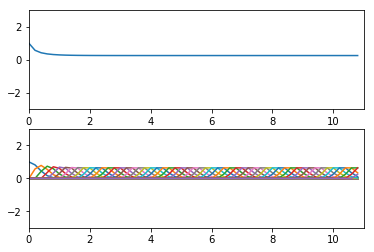

In [4]:
param = 0.1
n=55
K_ss = kernel(x_task, x_task, param)
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(55))
plt.subplot(2,1,1)
plt.axis([0,11,-3,3])
plt.plot(x_task,np.diagonal(L))
plt.subplot(2,1,2)
plt.axis([0,11,-3,3])
plt.plot(x_task,L)
plt.show()

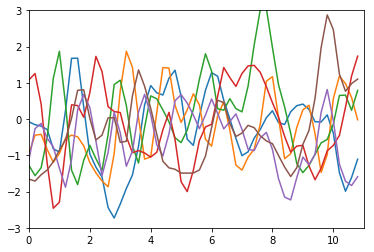

In [5]:
f_prior = np.dot(L, np.random.normal(size=(n,6)))
plt.axis([0,11,-3,3])
plt.plot(x_task, f_prior)
plt.show()

In [6]:
# Noiseless training data
Xtrain = np.array(np.arange(-5,3,0.9)).reshape(-1,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(x_train, x_train, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(x_train)))

# Compute the mean at our test points.
K_s = kernel(x_train, x_task, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, y_train)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

In [12]:
print(K_s.shape)

(8, 55)


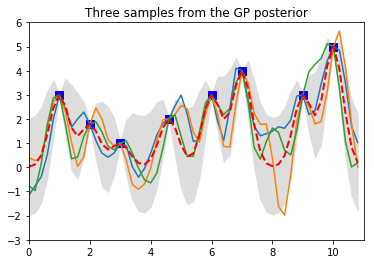

In [8]:
plt.plot(x_train, y_train, 'bs', ms=8)
plt.plot(x_task, f_post)
plt.gca().fill_between(x_task.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(x_task, mu, 'r--', lw=2)
plt.axis([0, 11, -3, 6])
plt.title('Three samples from the GP posterior')
plt.show()